# Solve the XOR problem
XOR OR exclusive OR is a logical operation that takes two binary inputs and produces an output. 
The XOR operation returns 1 if the number of 1 inputs is odd, and 0 if the number of 1 inputs is even. 
It can be summarized as follows:

<table>
  <tr>
    <th>A</th>
    <th>B</th>
    <th>A XOR B</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>
</table>


- The XOR function is nonlinear and cannot be effectively modeled by a single linear neuron.
- Perceptrons (single linear neuron) are  `linear classifiers` and can be used only for linear separable use cases and XOR is one of the logical operations which are not linearly separable as the data points will overlap the data points of the linear line or different classes occur on a single side of the linear line. 
- The problem with XOR is that it is not linearly separable; there is no single straight line that can separate the 0s from the 1s in the input space.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

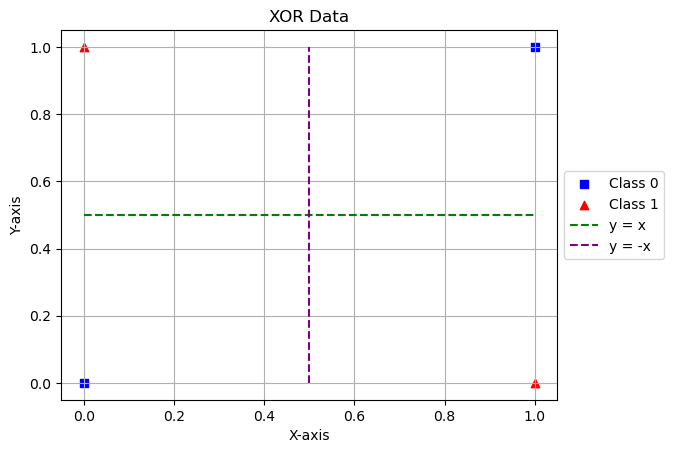

In [4]:
# XOR data
X, y = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0])

class_0 = X[y == 0]; class_1 = X[y == 1]

fig, ax = plt.subplots()
ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='s', label='Class 0')
ax.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='^', label='Class 1')

x_values_1, x_values_2 = np.linspace(0, 1, 100), [0.5]*100
y_values1, y_values2 = [0.5]*x_values_1.shape[0], np.linspace(0, 1, 100)

ax.plot(x_values_1, y_values1, linestyle='--', color='green', label='y = x')
ax.plot(x_values_2, y_values2, linestyle='--', color='purple', label='y = -x')

ax.set_xlabel('X-axis'); ax.set_ylabel('Y-axis')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True); plt.title('XOR Data'); plt.show()

In [5]:
class NN_BP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize the network architecture
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.ones((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.ones((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)
        return self.output_layer_output

    def backward(self, X, y, output):
        # δ_k = ∂E/∂a_out = y - output
        self.output_error = y - output
        # ∂E/∂W = ∂E/∂a_out * ∂a_out/∂W
        self.output_delta = self.output_error * self.sigmoid_derivative(output)

        self.hidden_layer_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_layer_delta = self.hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(self.output_delta) * self.learning_rate
        self.bias_output += np.sum(self.output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.reshape(-1, 1).dot(self.hidden_layer_delta) * self.learning_rate
        self.bias_hidden += np.sum(self.hidden_layer_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward and backward pass for each training example
            for i in range(len(X)):
                output = self.forward(X[i])
                self.backward(X[i], y[i], output)
            # Calculate and print the mean squared error for this epoch
            mse = np.mean(np.square(y - self.forward(X)))
            if (epoch + 1)%100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Mean Squared Error: {mse:.4f}")

    def predict(self, X):
        # Make predictions for a set of inputs
        predictions = []
        for i in range(len(X)):
            output = self.forward(X[i])
            predictions.append(output)
        return np.array(predictions)

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NN_BP(input_size=2, hidden_size=4, output_size=1, learning_rate=0.05)
nn.train(X, y, epochs=10000)

Epoch 100/10000, Mean Squared Error: 0.2505
Epoch 200/10000, Mean Squared Error: 0.2502
Epoch 300/10000, Mean Squared Error: 0.2501
Epoch 400/10000, Mean Squared Error: 0.2500
Epoch 500/10000, Mean Squared Error: 0.2499
Epoch 600/10000, Mean Squared Error: 0.2499
Epoch 700/10000, Mean Squared Error: 0.2498
Epoch 800/10000, Mean Squared Error: 0.2497
Epoch 900/10000, Mean Squared Error: 0.2496
Epoch 1000/10000, Mean Squared Error: 0.2496
Epoch 1100/10000, Mean Squared Error: 0.2495
Epoch 1200/10000, Mean Squared Error: 0.2494
Epoch 1300/10000, Mean Squared Error: 0.2493
Epoch 1400/10000, Mean Squared Error: 0.2491
Epoch 1500/10000, Mean Squared Error: 0.2490
Epoch 1600/10000, Mean Squared Error: 0.2489
Epoch 1700/10000, Mean Squared Error: 0.2487
Epoch 1800/10000, Mean Squared Error: 0.2486
Epoch 1900/10000, Mean Squared Error: 0.2484
Epoch 2000/10000, Mean Squared Error: 0.2482
Epoch 2100/10000, Mean Squared Error: 0.2480
Epoch 2200/10000, Mean Squared Error: 0.2478
Epoch 2300/10000, M

In [10]:
predictions = nn.predict(X)

print("\nPredictions:\n"); print(30*"==")
for i in range(len(X)):
    input_values = ", ".join(map(str, X[i]))
    predicted_prob = predictions[i][0][0]
    predicted_label = 1 if predicted_prob >= 0.5 else 0
    print(f"\nInput: [{input_values}], Predicted Probability: {predicted_prob:.4f}, Label: {predicted_label}\n")
print(30*"==")


Predictions:


Input: [0, 0], Predicted Probability: 0.0637, Label: 0


Input: [0, 1], Predicted Probability: 0.8682, Label: 1


Input: [1, 0], Predicted Probability: 0.8589, Label: 1


Input: [1, 1], Predicted Probability: 0.1695, Label: 0



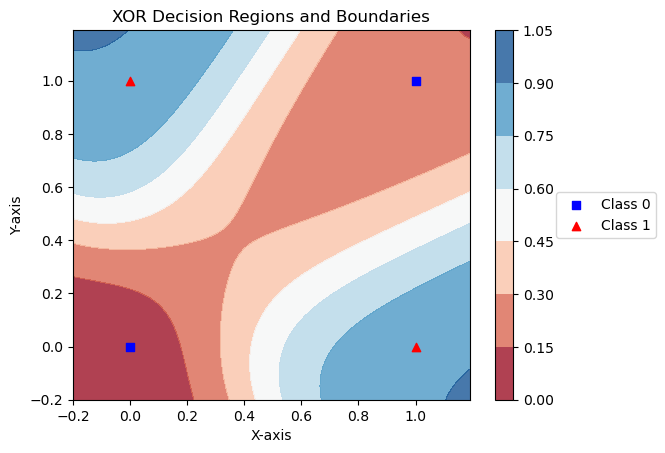

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -0.2, 1.2
y_min, y_max = -0.2, 1.2
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = nn.predict(grid_points)
Z = predictions[:, 0].reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8); plt.colorbar()

plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='s', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='^', label='Class 1')

plt.xlabel('X-axis'); plt.ylabel('Y-axis'); plt.legend(loc='upper right')

plt.title('XOR Decision Regions and Boundaries')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()